# Лабораторная работа 5. 

# Цветовые модели. Цветовая сегментация


В этой работе рассматриваются базовые цветовые модели, методы конвертации, цветовая сегментация.

Цель лабораторной работы: научиться применять методы конвертации цветовых моделей и выполнить  цветовую сегментацию выданного изображения.

#
Настроим Jupyter на отображение полного интерактивного вывода:

#

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

### 2.4.1 Цветовая модель RGB

RGB (Red, Green, Blue - красный, зеленый, синий) - цветовая модель, описывающая способ кодирования цвета для цветовоспроизведения с помощью трёх цветов, которые принято называть основными. Выбор основных цветов обусловлен особенностями физиологии восприятия цвета сетчаткой человеческого глаза. Сетчатка глаза имеет три вида рецепторов (колбочек), ответственных за цветное зрение. Можно считать, что каждый вид колбочек даёт свой отклик на определённую длину волны видимого спектра.
 Система координат RGB - куб с началом отсчета ⟨0,0,0⟩, соответствующим черному цвету. Максимальное значение RGB - ⟨255,255,255⟩ соответствует белому цвету.

<img src="../content/RGB_color_cube.png" width="800"/>

В модели RGB не разделены яркостная и оттеночная компоненты цвета, здесь легко указать яркости для одного из основных цветов, но затруднительно указать оттенок с требуемым цветовым тоном (например, телесным) и насыщенностью.

## 2.4 Цветовые модели

Цветные цифровые изображения представляют собой совокупность трех цветовых плоскостей, каждая из которых характеризует одну независимую составляющую цвета, представленную в том же формате, что и обычное 8-битное полутоновое изображение.

### 2.4.2 Цветовые модели HSV и HSI

 Цветовая модель HSV (Hue, Saturation, Value - цветовой тон, насыщенность, мера яркости) - модель, ориентированная на человека и обеспечивающая возможность явного задания требуемого оттенка цвета. Среди прочих используемых в настоящее время моделей, эта модель отражает физические свойства цвета и наиболее точно соответствует способу восприятия цвета человеческим глазом.
 Оттенок цвета (H) - это длина световой волны, отраженной или прошедшей через объект. Насыщенность (S) характеризует степень, уровень выражения оттенка цвета. Она определяет соотношение серого цвета и выбранного оттенка и выражается в долях от 0 (серый) до 1 (полностью насыщенный). Мера яркости (V) характеризует интенсивность цвета, поэтому она измеряется в диапазоне от 0 (черный) до 1 (белый). При увеличении яркости цвет становится более светлым (белым). Составляющая V является нелинейной, что близко соответствует восприятию человеком светлых и темных цветов.

<img src="../content/HSV-color-visualization.png" width="300"/>

С точки зрения обработки изображений цветовое пространство удобно тем, что позволяет непосредственно оперировать интенсивностью (яркостью) и цветом (тоном) пикселя.

Существует также цветовая модель HSL (hue, saturation, lightness) или HSI (hue, saturation, intensity) , которая строится по такому же принципу, что и модель HSV, но отличающаяся кодированием цвета пикселя и, соответственно, формулами преобразования из цветового пространства RGB в HSI/HSV и обратно.

**HSV vs. HSL**
Представление **HSL** моделирует то, как различные краски смешиваются вместе, чтобы создать цвет в реальном мире. Полностью насыщенные цвета размещаются вокруг круга при значении светлоты 1/2, при этом значение светлоты 0 или 1 соответствует полностью черному или белому соответственно. Между тем, представление HSV моделирует, как цвета появляются при свете. Разница между HSL и HSV заключается в том, что цвет с максимальной светлотой в HSL является чисто белым, но цвет с максимальным значением / яркостью в HSV аналогичен освещению белого света на цветном объекте (например, яркое белый свет на красный объект заставляет объект по-прежнему казаться красным, просто ярче и интенсивнее, в то время как тусклый свет на красный объект заставляет объект казаться темнее и менее ярким).

Наглядно разницу между HSV и HSL можно увидеть на изображениях визуализации цветовых пространств:

<img src="../content/HSL vs HSV.png" width="600"/>

Подробнее про различия HSL и HSV моделей можно прочитать [здесь](https://en.wikipedia.org/wiki/HSL_and_HSV)

Алгоритмы преобразования из RGB в HSV и наоборот можно посмотреть [здесь](https://ru.wikipedia.org/wiki/HSV_(%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C))

Алгоритмы преобразования из RGB в HSL и наоборот можно посмотеть [здесь](https://ru.wikipedia.org/wiki/HSL)

**В OpenCV есть готовый метод преобразования изображений из одних цветовых моделей в другие:**
`cv.cvtColor(image, ColorConversionType)`
Где ColorConversionType - тип преобразования из одной цветовой модели в другую:
cv.COLOR_BGR2RGB - преобразование из BGR в RGB
cv.COLOR_RGB2BGR - преобразование из RGB в BGR
cv.COLOR_BGR2GRAY - преобразование из BGR в GRAY
cv.COLOR_RGB2GRAY - преобразование из RGB в GRAY
cv.COLOR_GRAY2RGB - преобразование из GRA в RGB
cv.COLOR_GRAY2BGR - преобразование из GRA в BGR
cv.COLOR_HSV2RGB - преобразование из HSV в RGB
cv.COLOR_HLS2RGB - преобразование из HLS в RGB
cv.COLOR_RGB2HSV - преобразование из RGB в HSV
cv.COLOR_RGB2HLS - преобразование из RGB в HLS

Полный список типов конвертации можно посмотреть в [документации](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)

In [14]:
%reset

Nothing done.


In [15]:

import sys
sys.path.append('../')
%matplotlib inline
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from matplotlib import colors
from matplotlib.colors import hsv_to_rgb


Загружаем изображение. Преобразуем в модель RGB

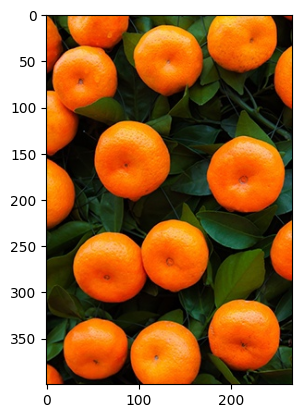

In [16]:
image = cv.imread('img.jpg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

Отображаем разные каналы по разным осям на трехмерном графике. В случае модели RGB не видно кластеризации по цвету.

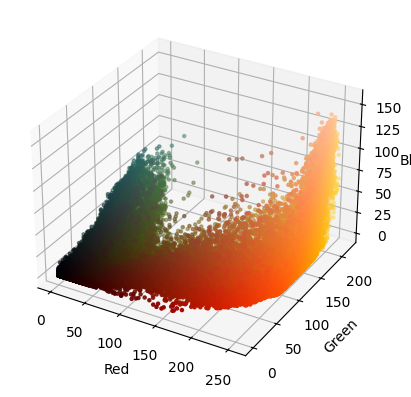

In [17]:
r, g, b = cv.split(image_rgb)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
pixel_colors = image_rgb.reshape((np.shape(image_rgb)[0]*np.shape(image_rgb)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Построим отдельный канал красного цвета

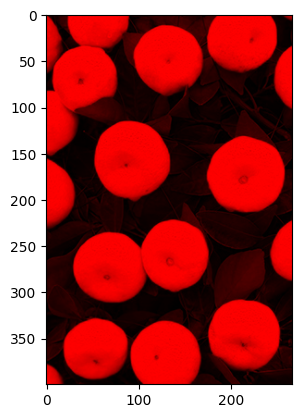

In [18]:
red = image_rgb.copy()
# set blue and green channels to 0
red[:, :, 1] = 0
red[:, :, 2] = 0
# RGB - Red
plt.imshow(red)
plt.show()

Преобразуем изображение в цветовую модель HSV

In [19]:
image_hsv = cv.cvtColor(image_rgb, cv.COLOR_RGB2HSV)


Отобразим разные каналы полученного изображения на трехмерном графике

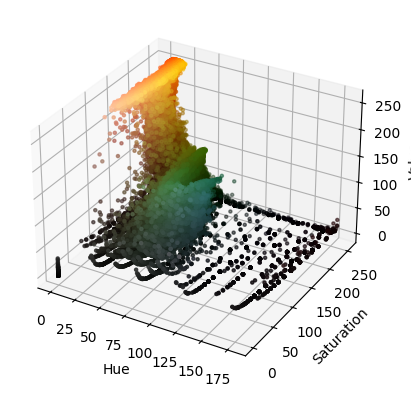

In [20]:
h, s, v = cv.split(image_hsv)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

Создадим маски для разных оттенков синего цвета

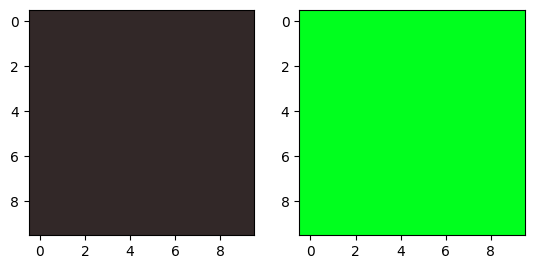

In [21]:
lower_blue = np.array([0,50,50])
upper_blue = np.array([90,255,255])
lo_square = np.full((10, 10, 3), lower_blue, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), upper_blue, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square))
plt.show()

Найдем на изображении цвета подходящие под маску от светлосинего до темносинего. И добавим маску на изображение.

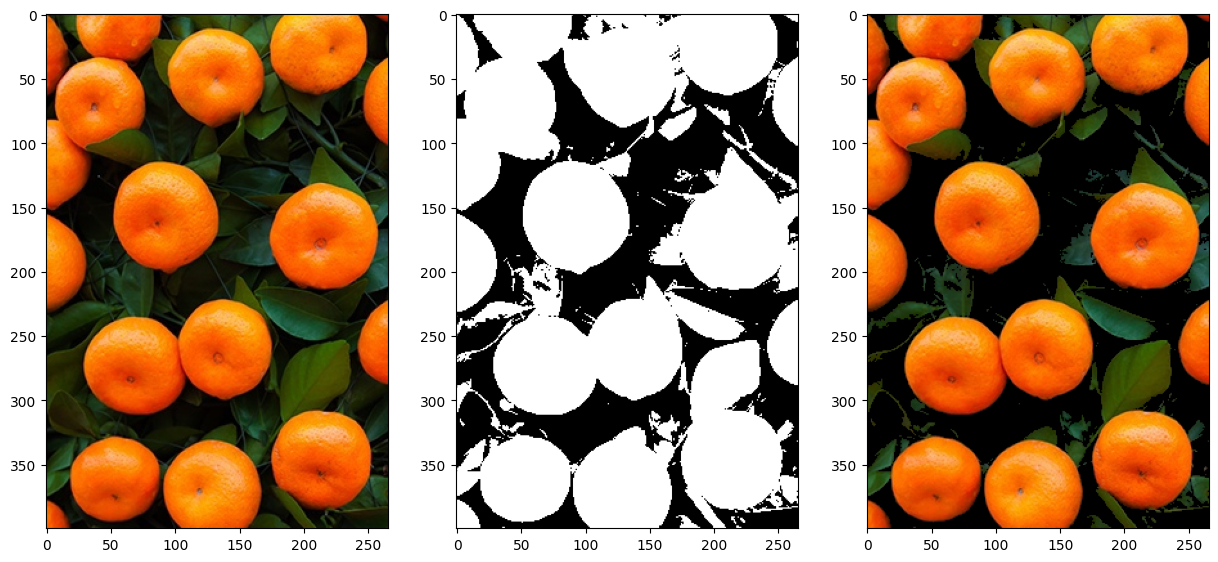

In [22]:
mask = cv.inRange(image_hsv, lower_blue, upper_blue)
result = cv.bitwise_and(image_rgb, image_rgb, mask=mask)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result)
plt.show()

Зададим другую маску

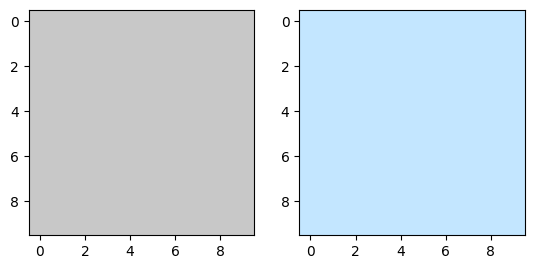

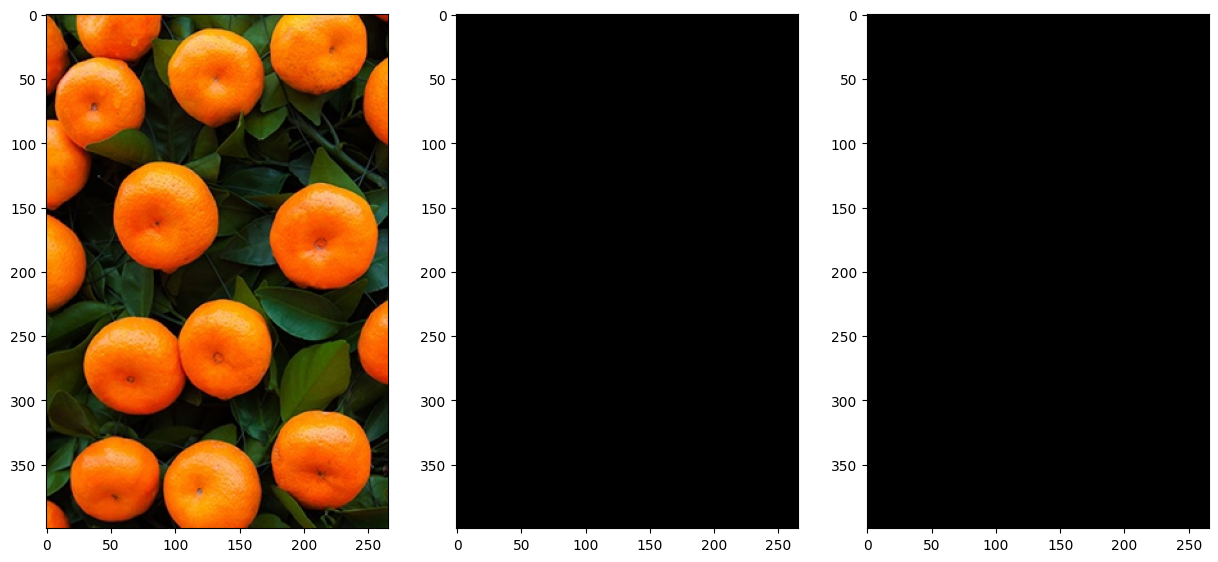

In [23]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

lw_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
dw_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lw_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(dw_square))
plt.show()

mask_white = cv.inRange(image_hsv, light_white, dark_white)
result_white = cv.bitwise_and(image_hsv, image_hsv, mask=mask_white)
plt.figure(figsize=(15,20))

plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.subplot(1, 3, 2)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(result_white)
plt.show()

Применим обе маски и сгладим изображение

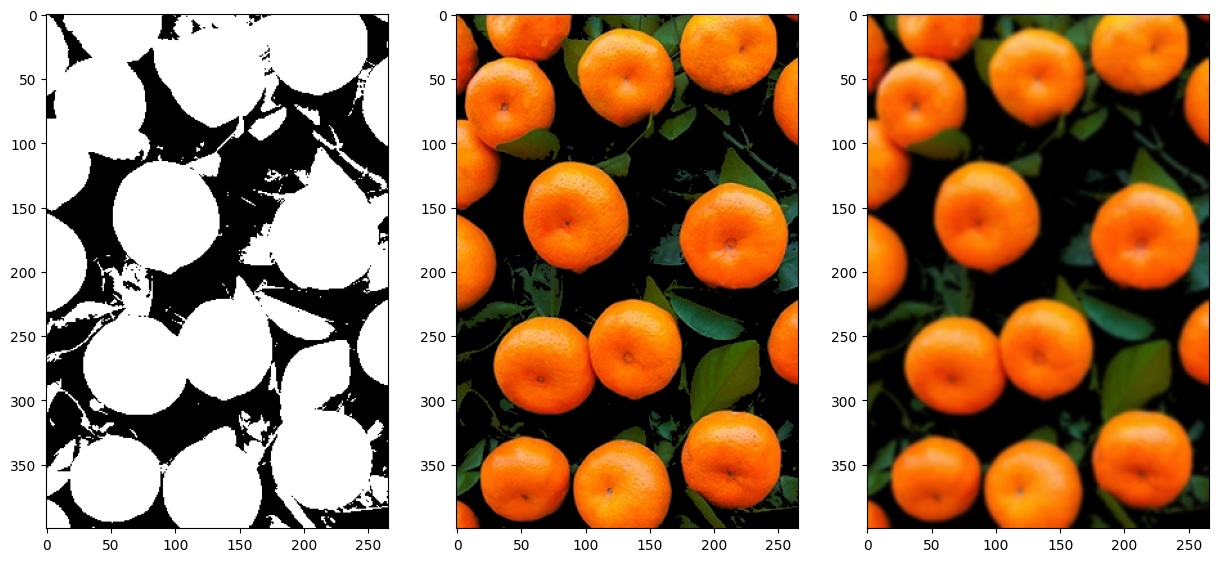

In [24]:
final_mask = mask + mask_white

final_result = cv.bitwise_and(image_rgb, image_rgb, mask=final_mask)
blur = cv.GaussianBlur(final_result, (7, 7), 0)

plt.figure(figsize=(15,20))
plt.subplot(1, 3, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(final_result)
plt.subplot(1, 3, 3)
plt.imshow(blur)
plt.show()

Пробуем сделать цветовую сегментацию

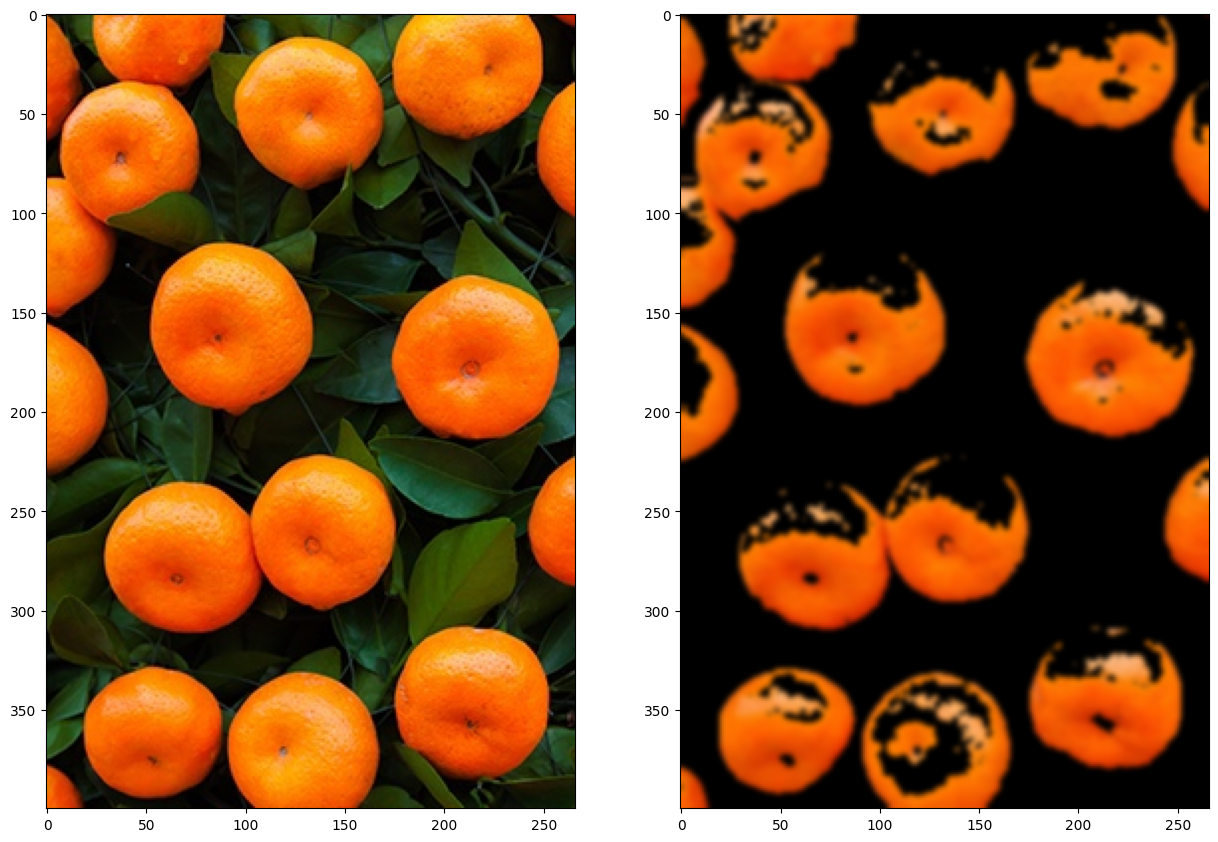

In [25]:
def segment_image(image):
    ''' Attempts to segment the whale out of the provided image '''

    # Convert the image into HSV
    hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)

    # Set the blue range
    lower_blue = (0, 0, 0)
    upper_blue = (0, 0, 0)

    # Apply the blue mask 
    mask = cv.inRange(hsv_image, lower_blue, upper_blue)

    # Set a white range
    light_white = (0, 60, 200)
    dark_white = (15, 255, 255)

    # Apply the white mask
    mask_white = cv.inRange(hsv_image, light_white, dark_white)

    # Combine the two masks
    final_mask = mask + mask_white
    result = cv.bitwise_and(image, image, mask=final_mask)

    # Clean up the segmentation using a blur
    blur = cv.GaussianBlur(result, (7, 7), 0)
    return blur


result = segment_image(image_rgb)

plt.figure(figsize=(15,20))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

Самостоятельное задание. Сделать цветовую сегментацию выданного изображения. 
Пороги для цветовой сегментации подобрать в ручную, используя преобразование изображения 
в формат LAB.

### Еще пример цветовой сегментации

Известно, что цветные цифровые изображения представляют собой совокупность трех цветовых плоскостей, каждая из которых характеризует одну независимую составляющую цвета, представленную в том же формате, что и обычное 8-битное полутоновое изображение. Следовательно, все описанные процедуры обработки полутоновых изображений в яркостной области могут быть обобщены и на случай обработки цветных изображений. Специфика же здесь связана прежде всего с различными цветовыми моделями, позволяющими по-разному работать с разными цветовыми и другими составляющими изображения.


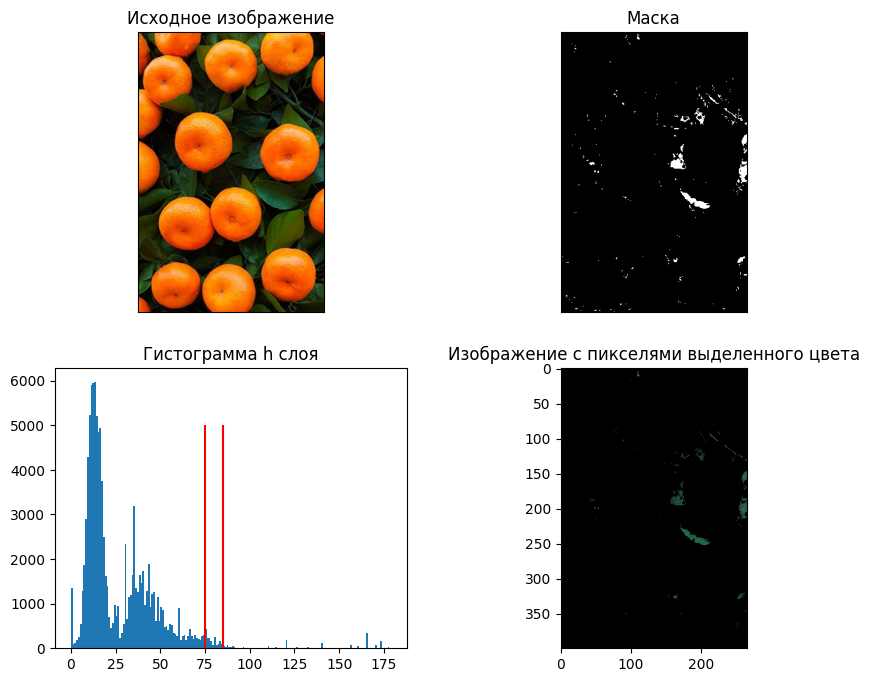

In [26]:
image3 = cv.imread('img.jpg')
rgb_image3 = cv.cvtColor(image3, cv.COLOR_BGR2RGB)
hsv_image3 = cv.cvtColor(rgb_image3, cv.COLOR_RGB2HSV)
h, s, v = cv.split(hsv_image3)

low_h = 75
high_h = 85

mask = cv.inRange(h, low_h, high_h)
result = cv.bitwise_and(rgb_image3, rgb_image3, mask=mask)

gs = plt.GridSpec(2, 2)
plt.figure(figsize=(10, 8))
plt.subplot(gs[0])
plt.imshow(rgb_image3)
plt.title('Исходное изображение')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[1])
plt.imshow(mask, cmap='gray')
plt.title('Маска')
plt.xticks([]), plt.yticks([])
plt.subplot(gs[2])
plt.hist(h.reshape(-1), np.max(h), [np.min(h), np.max(h)])
plt.vlines(low_h, 0, 5000, 'r'), plt.vlines(high_h, 0, 5000, 'r')
plt.title('Гистограмма h слоя')
plt.subplot(gs[3])
plt.imshow(result)
plt.title('Изображение с пикселями выделенного цвета')
plt.show()